In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
dataset_path = 'dataset.csv'
df = pd.read_csv(dataset_path)


# Show the first few rows to get an initial understanding of the data
df.head()


,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,12331,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.250000
1,52235.0,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,,...,No,No,Unknown,No,No,NaN,Unknown,Unknown,-2.733333,121.066667
2,47620.0,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61560,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.350000,50.000000
3,47360.0,Madagascar -- 47350,Andoany,,,Madagascar,Mozambique Channel; Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61420,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.400000,48.300000
4,47020.0,Tanzania -- 46965,Chake Chake,,,Tanzania,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61200,...,No,No,Unknown,No,No,Unknown,Unknown,Unknown,-5.250000,39.766667


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Columns: 107 entries, World Port Index Number to Longitude
dtypes: float64(15), int64(1), object(91)
memory usage: 3.1+ MB


In [3]:
# Function to delete columns with more than 60% values equal to zero, space, and 'Unknown'
def drop_columns(df):
    num_rows = len(df)
    threshold = 0.6 * num_rows
    cols_to_drop = []
    
    for col in df.columns:
        zero_count = (df[col] == 0).sum()
        space_count = (df[col] == ' ').sum()
        unknown_count = (df[col] == 'Unknown').sum()
        
        if zero_count + space_count + unknown_count > threshold:
            cols_to_drop.append(col)
            
    return df.drop(columns=cols_to_drop)

# Apply the function to the sample DataFrame
df = drop_columns(df)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   World Port Index Number             3824 non-null   float64
 1   Region Name                         3824 non-null   object 
 2   Main Port Name                      3824 non-null   object 
 3   UN/LOCODE                           3824 non-null   object 
 4   Country Code                        3824 non-null   object 
 5   World Water Body                    3824 non-null   object 
 6   Sailing Direction or Publication    3824 non-null   object 
 7   Publication Link                    3824 non-null   object 
 8   Standard Nautical Chart             3824 non-null   object 
 9   Digital Nautical Chart              3824 non-null   object 
 10  Tidal Range (m)                     3824 non-null   float64
 11  Channel Depth (m)                   3824 no

In [5]:
df.describe()

,World Port Index Number,Tidal Range (m),Channel Depth (m),Anchorage Depth (m),Cargo Pier Depth (m),Oil Terminal Depth (m),Latitude,Longitude
count,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000
mean,31439.317364,1.701935,8.374843,11.590429,6.486689,5.199085,31.609381,-1.974755
std,19124.175981,2.706292,6.708034,7.929710,4.829993,17.138813,26.260779,83.435017
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.850000,-177.366667
25%,13147.500000,0.000000,3.400000,6.400000,3.400000,0.000000,16.716667,-72.633333
50%,31745.000000,1.000000,7.900000,11.000000,6.400000,0.000000,39.123500,4.941667
75%,48079.500000,2.100000,12.500000,17.100000,9.400000,9.400000,49.920834,39.212500
max,63130.000000,90.000000,25.600000,56.000000,25.000000,970.000000,78.928333,179.367500


In [6]:
# Count number of cells in each column which have just one space as their field
# This is a common way of representing missing values in a dataset
df[df == ' '].count()

#print of each column and the number of space values it has sorted in descending order top twenty records
df[df == ' '].count().sort_values(ascending=False).head(20)



Standard Nautical Chart            486
UN/LOCODE                          473
Shelter Afforded                   182
Harbor Type                        174
Harbor Size                        122
Region Name                        113
Country Code                         4
Communications - Radiotelephone      0
Communications - Airport             0
Communications - Radio               0
Communications - Rail                0
NAVAREA                              0
Facilities - Wharves                 0
Facilities - Anchorage               0
Medical Facilities                   0
Garbage Disposal                     0
World Port Index Number              0
Dirty Ballast Disposal               0
Tugs - Assistance                    0
Cranes - Mobile                      0
dtype: int64

In [7]:
#print of each column and the number of zero values it has sorted in descending order top twenty records
df[df == 0].count().sort_values(ascending=False).head(20)

Oil Terminal Depth (m)             2136
Tidal Range (m)                    1268
Cargo Pier Depth (m)                656
Channel Depth (m)                   642
Anchorage Depth (m)                 501
Dirty Ballast Disposal                0
Communications - Telephone            0
Communications - Radio                0
Communications - Radiotelephone       0
Communications - Airport              0
Communications - Rail                 0
NAVAREA                               0
Facilities - Wharves                  0
Facilities - Anchorage                0
Medical Facilities                    0
Garbage Disposal                      0
World Port Index Number               0
Cranes - Mobile                       0
Pilotage - Available                  0
Lifts - 0-24 Tons                     0
dtype: int64

In [8]:
#print of each column and the number of Unknown values it has sorted in descending order top twenty records
df[df == 'Unknown'].count().sort_values(ascending=False).head(50)

Communications - Radiotelephone       2225
Garbage Disposal                      2178
Lifts - 0-24 Tons                     2155
Cranes - Mobile                       2146
Facilities - Anchorage                2118
Communications - Rail                 1999
Overhead Limits                       1932
Good Holding Ground                   1897
Communications - Telephone            1862
Services - Longshoremen               1862
Quarantine - Pratique                 1814
Communications - Airport              1674
US Representative                     1561
Supplies - Provisions                 1546
First Port of Entry                   1544
Supplies - Diesel Oil                 1535
Communications - Radio                1224
Pilotage - Available                  1219
Dirty Ballast Disposal                1207
Entrance Restriction - Ice            1125
Tugs - Assistance                     1104
Supplies - Fuel Oil                   1094
Entrance Restriction - Tide           1071
Facilities 

In [9]:
# print all column names in the dataset in a grid format
print(df.columns.tolist())

['World Port Index Number', 'Region Name', 'Main Port Name', 'UN/LOCODE', 'Country Code', 'World Water Body', 'Sailing Direction or Publication', 'Publication Link', 'Standard Nautical Chart', 'Digital Nautical Chart', 'Tidal Range (m)', 'Channel Depth (m)', 'Anchorage Depth (m)', 'Cargo Pier Depth (m)', 'Oil Terminal Depth (m)', 'Harbor Size', 'Harbor Type', 'Shelter Afforded', 'Entrance Restriction - Tide', 'Entrance Restriction - Heavy Swell', 'Entrance Restriction - Ice', 'Entrance Restriction - Other', 'Overhead Limits', 'Good Holding Ground', 'Estimated Time of Arrival Message', 'Quarantine - Pratique', 'First Port of Entry', 'US Representative', 'Pilotage - Compulsory', 'Pilotage - Available', 'Tugs - Assistance', 'Communications - Telephone', 'Communications - Radio', 'Communications - Radiotelephone', 'Communications - Airport', 'Communications - Rail', 'NAVAREA', 'Facilities - Wharves', 'Facilities - Anchorage', 'Medical Facilities', 'Garbage Disposal', 'Dirty Ballast Disposa

In [10]:
# Drop the specified columns
df = df.drop(columns=['UN/LOCODE', 'Digital Nautical Chart', 'Publication Link', 'Standard Nautical Chart'])

# Replace fields with just a space with 'unknown'
df = df.fillna('Unknown')

# Replace space with 'unknown'
df = df.replace(' ', 'unknown')

In [11]:
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate basic descriptive statistics for numerical columns
numerical_stats = df[numerical_columns].describe().transpose()
numerical_stats['variance'] = df[numerical_columns].var()
numerical_stats = numerical_stats[['mean', '50%', 'variance', 'min', 'max']]
numerical_stats.rename(columns={'50%': 'median'}, inplace=True)

numerical_stats


,mean,median,variance,min,max
World Port Index Number,31439.317364,31745.000000,3.657341e+08,40.000000,63130.000000
Tidal Range (m),1.701935,1.000000,7.324014e+00,0.000000,90.000000
Channel Depth (m),8.374843,7.900000,4.499772e+01,0.000000,25.600000
Anchorage Depth (m),11.590429,11.000000,6.288030e+01,0.000000,56.000000
Cargo Pier Depth (m),6.486689,6.400000,2.332883e+01,0.000000,25.000000
Oil Terminal Depth (m),5.199085,0.000000,2.937389e+02,0.000000,970.000000
Latitude,31.609381,39.123500,6.896285e+02,-77.850000,78.928333
Longitude,-1.974755,4.941667,6.961402e+03,-177.366667,179.367500


In [12]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

# Calculate basic descriptive statistics for categorical columns
categorical_stats = df[categorical_columns].describe().transpose()

categorical_stats.head(10)  # Displaying first 10 to keep the output manageable


,count,unique,top,freq
Region Name,3824,347,United States E Coast -- 6585,197
Main Port Name,3824,3732,Georgetown,5
Country Code,3824,196,United States,666
World Water Body,3824,139,North Atlantic Ocean,465
Sailing Direction or Publication,3824,50,Sailing Directions Pub. 131 (Enroute) - Wester...,220
Harbor Size,3824,5,Very Small,2135
Harbor Type,3824,10,Coastal (Natural),1266
Shelter Afforded,3824,6,Good,1291
Entrance Restriction - Tide,3824,3,No,1955
Entrance Restriction - Heavy Swell,3824,3,No,2079


C:\Users\moham\AppData\Local\Temp\ipykernel_17840\80154210.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


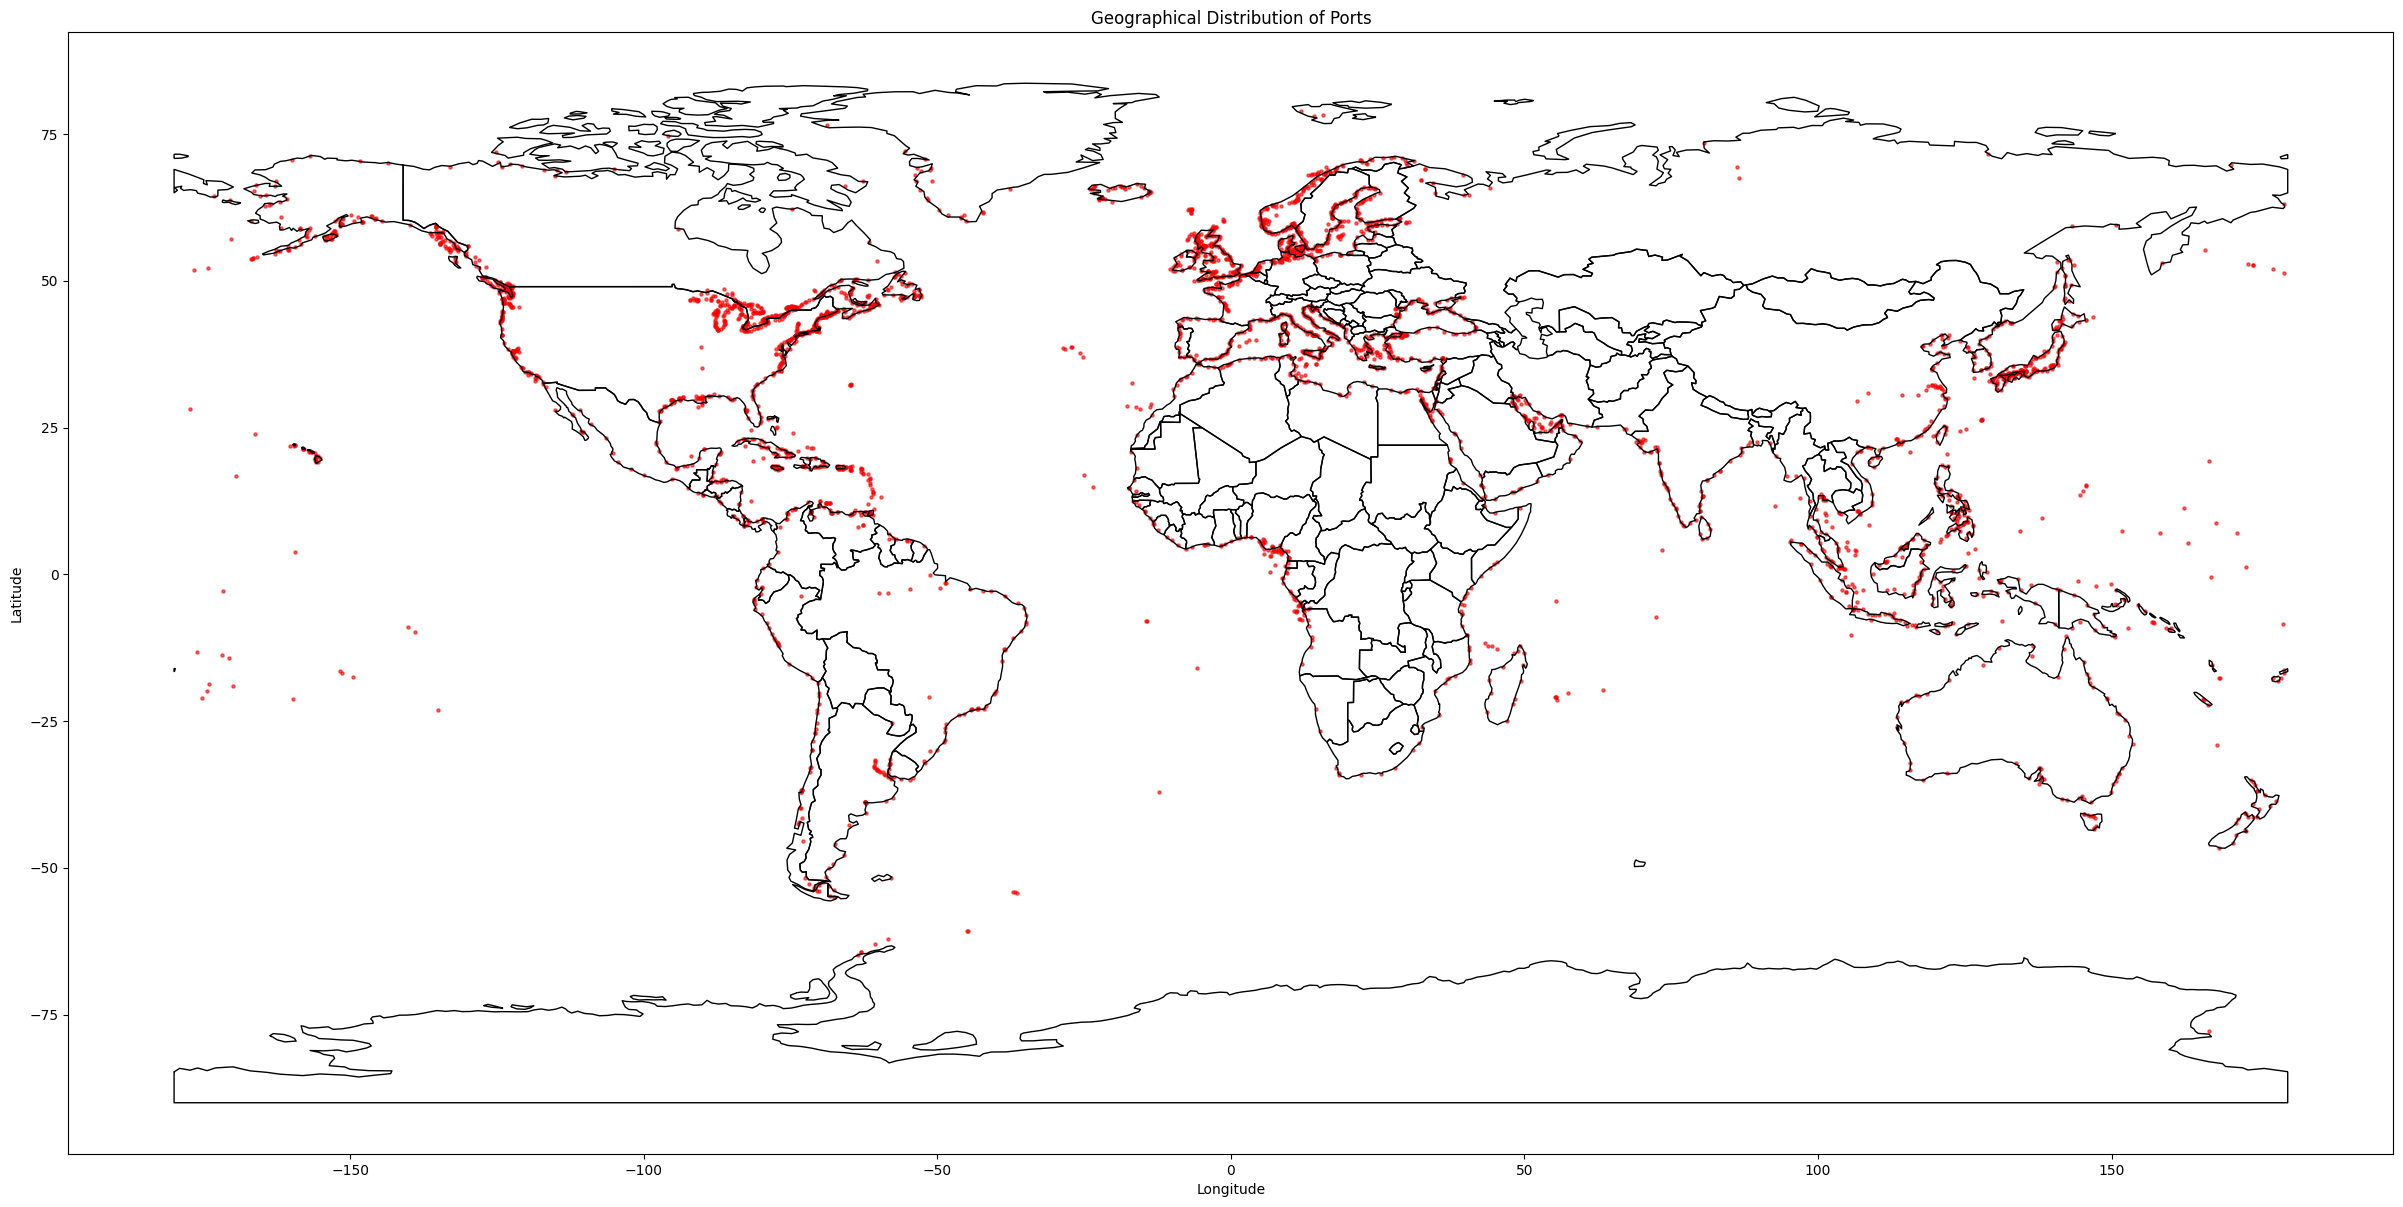

In [13]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a GeoDataFrame with the latitude and longitude of the ports
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map and ports
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
world.boundary.plot(ax=ax, linewidth=1, color='black')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)
plt.title('Geographical Distribution of Ports')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


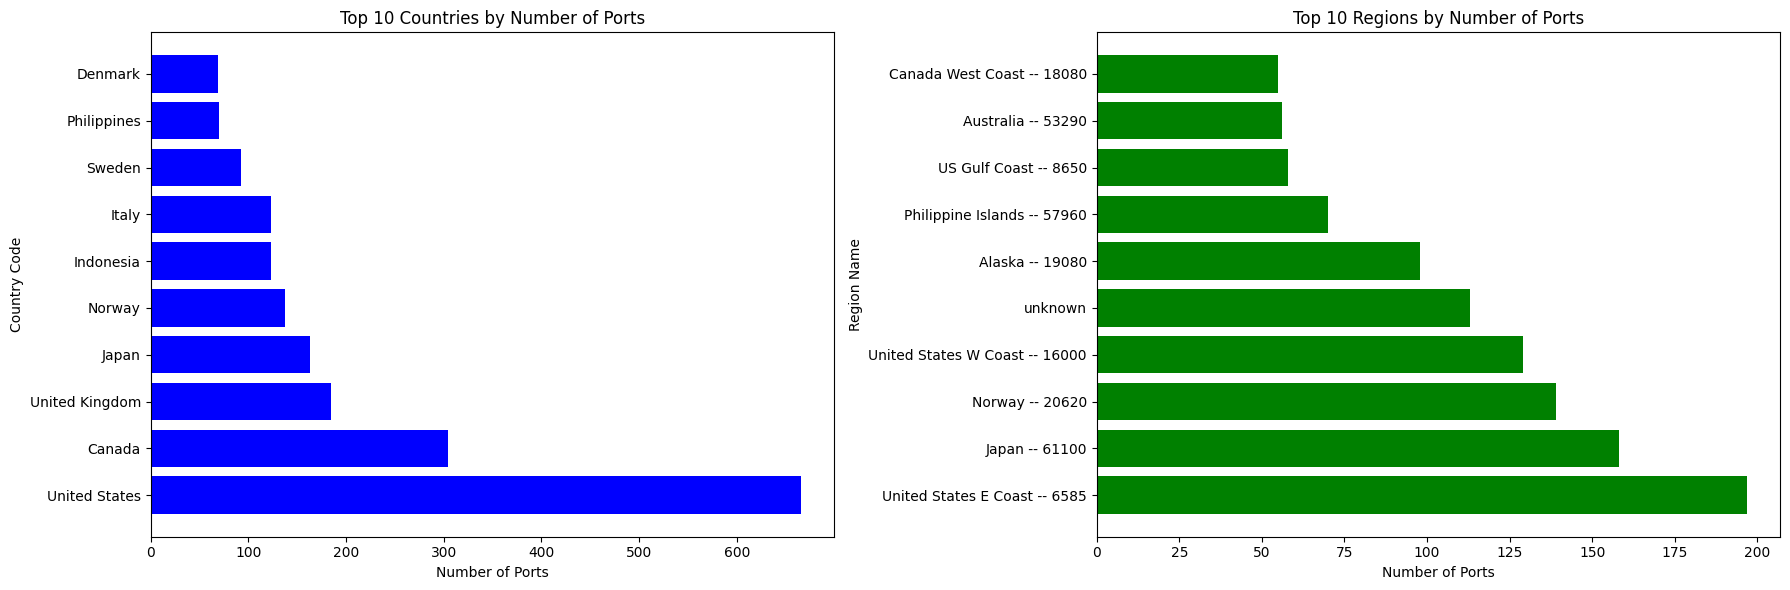

In [14]:
# Analyzing the distribution of ports by country and region
country_distribution = df['Country Code'].value_counts().reset_index()
country_distribution.columns = ['Country Code', 'Number of Ports']

region_distribution = df['Region Name'].value_counts().reset_index()
region_distribution.columns = ['Region Name', 'Number of Ports']

# Plotting the distribution by country and region
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# By Country
axes[0].barh(country_distribution['Country Code'][:10], country_distribution['Number of Ports'][:10], color='blue')
axes[0].set_title('Top 10 Countries by Number of Ports')
axes[0].set_xlabel('Number of Ports')
axes[0].set_ylabel('Country Code')

# By Region
axes[1].barh(region_distribution['Region Name'][:10], region_distribution['Number of Ports'][:10], color='green')
axes[1].set_title('Top 10 Regions by Number of Ports')
axes[1].set_xlabel('Number of Ports')
axes[1].set_ylabel('Region Name')

plt.tight_layout()
plt.show()


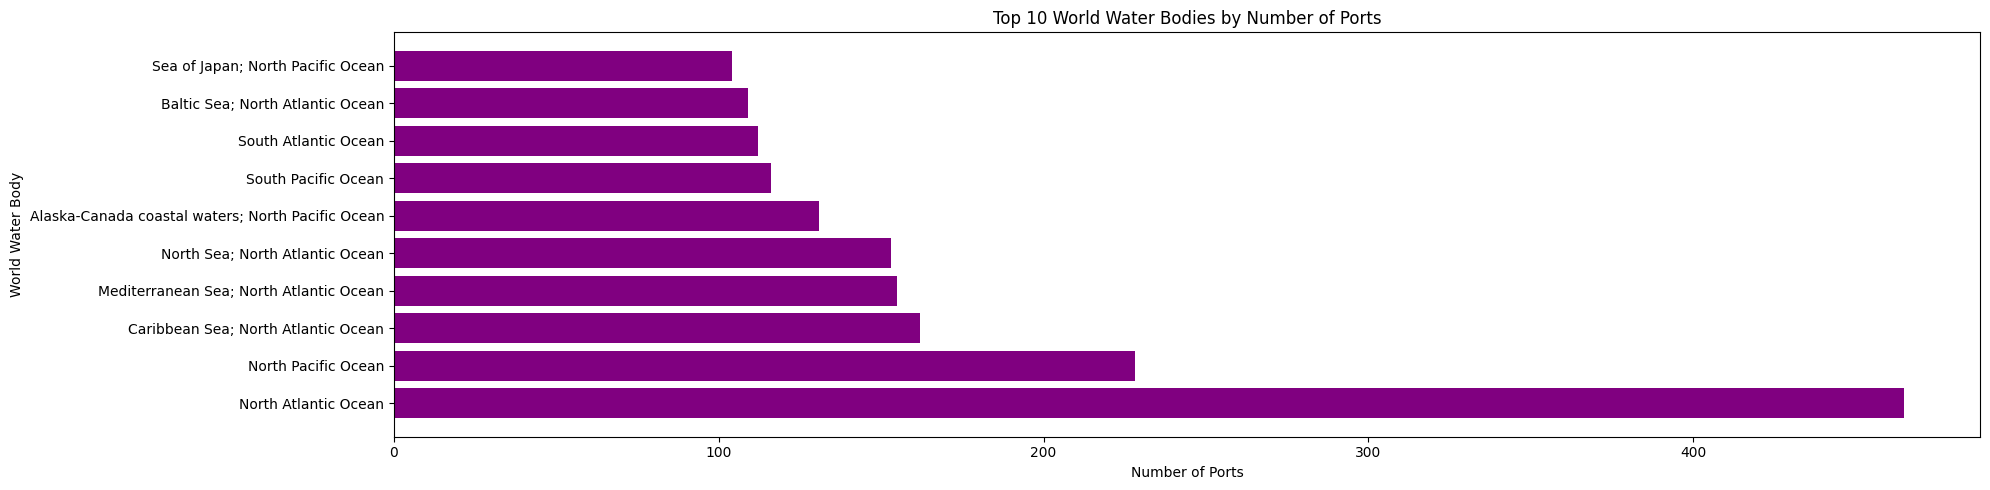

In [15]:
# Analyzing the distribution of ports by world water bodies
water_body_distribution = df['World Water Body'].value_counts().reset_index()
water_body_distribution.columns = ['World Water Body', 'Number of Ports']

# Plotting the distribution by world water bodies
plt.figure(figsize=(20, 5))
plt.barh(water_body_distribution['World Water Body'][:10], water_body_distribution['Number of Ports'][:10], color='purple')
plt.title('Top 10 World Water Bodies by Number of Ports')
plt.xlabel('Number of Ports')
plt.ylabel('World Water Body')
plt.tight_layout()
plt.show()


In [16]:
# Extracting columns related to facilities and services
facilities_columns = [col for col in df.columns if 'Facility -' in col or 'Supplies -' in col or 'Services -' in col]

# Count the frequency of each facility and service
facilities_count = df[facilities_columns].apply(pd.Series.value_counts).fillna(0).transpose()
facilities_count.columns = ['No', 'Unknown', 'Yes']
facilities_count['Total Ports'] = facilities_count.sum(axis=1)

# Calculate the percentage availability, unavailability, and unknown status
facilities_count['Percentage Available'] = (facilities_count['Yes'] / facilities_count['Total Ports']) * 100
facilities_count['Percentage Unavailable'] = (facilities_count['No'] / facilities_count['Total Ports']) * 100
facilities_count['Percentage Unknown'] = (facilities_count['Unknown'] / facilities_count['Total Ports']) * 100

# Sort by percentage availability
facilities_count = facilities_count.sort_values(by='Percentage Available', ascending=False)

# Combine the most common and least common facilities into a single DataFrame
facilities = facilities_count[['Percentage Available', 'Percentage Unavailable', 'Percentage Unknown']]

# Display all facilities in a tabular format
facilities




,Percentage Available,Percentage Unavailable,Percentage Unknown
Supplies - Potable Water,77.641213,5.622385,16.736402
Supplies - Fuel Oil,61.114017,10.277197,28.608787
Supplies - Provisions,55.360879,4.210251,40.428870
Supplies - Diesel Oil,50.653766,9.205021,40.141213
Services - Longshoremen,48.352510,2.955021,48.692469


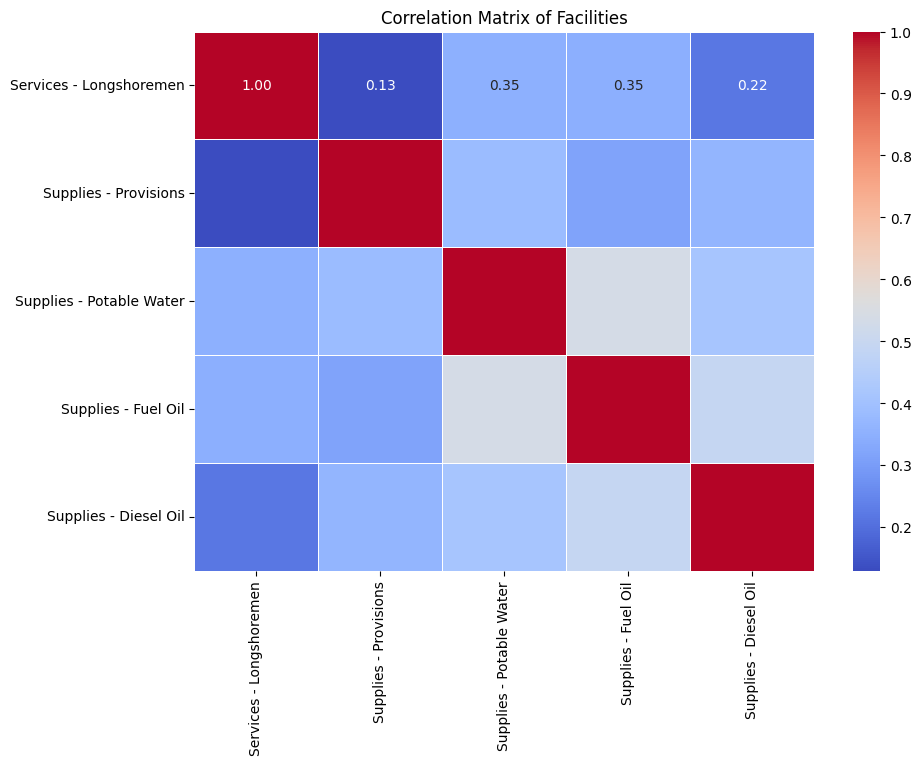

In [27]:
# Convert the facilities data to numerical format for correlation analysis
facilities_numerical = df[facilities_columns].replace({'Yes': 1, 'No': 0, 'Unknown': None}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = facilities_numerical.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Facilities')
plt.show()


d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


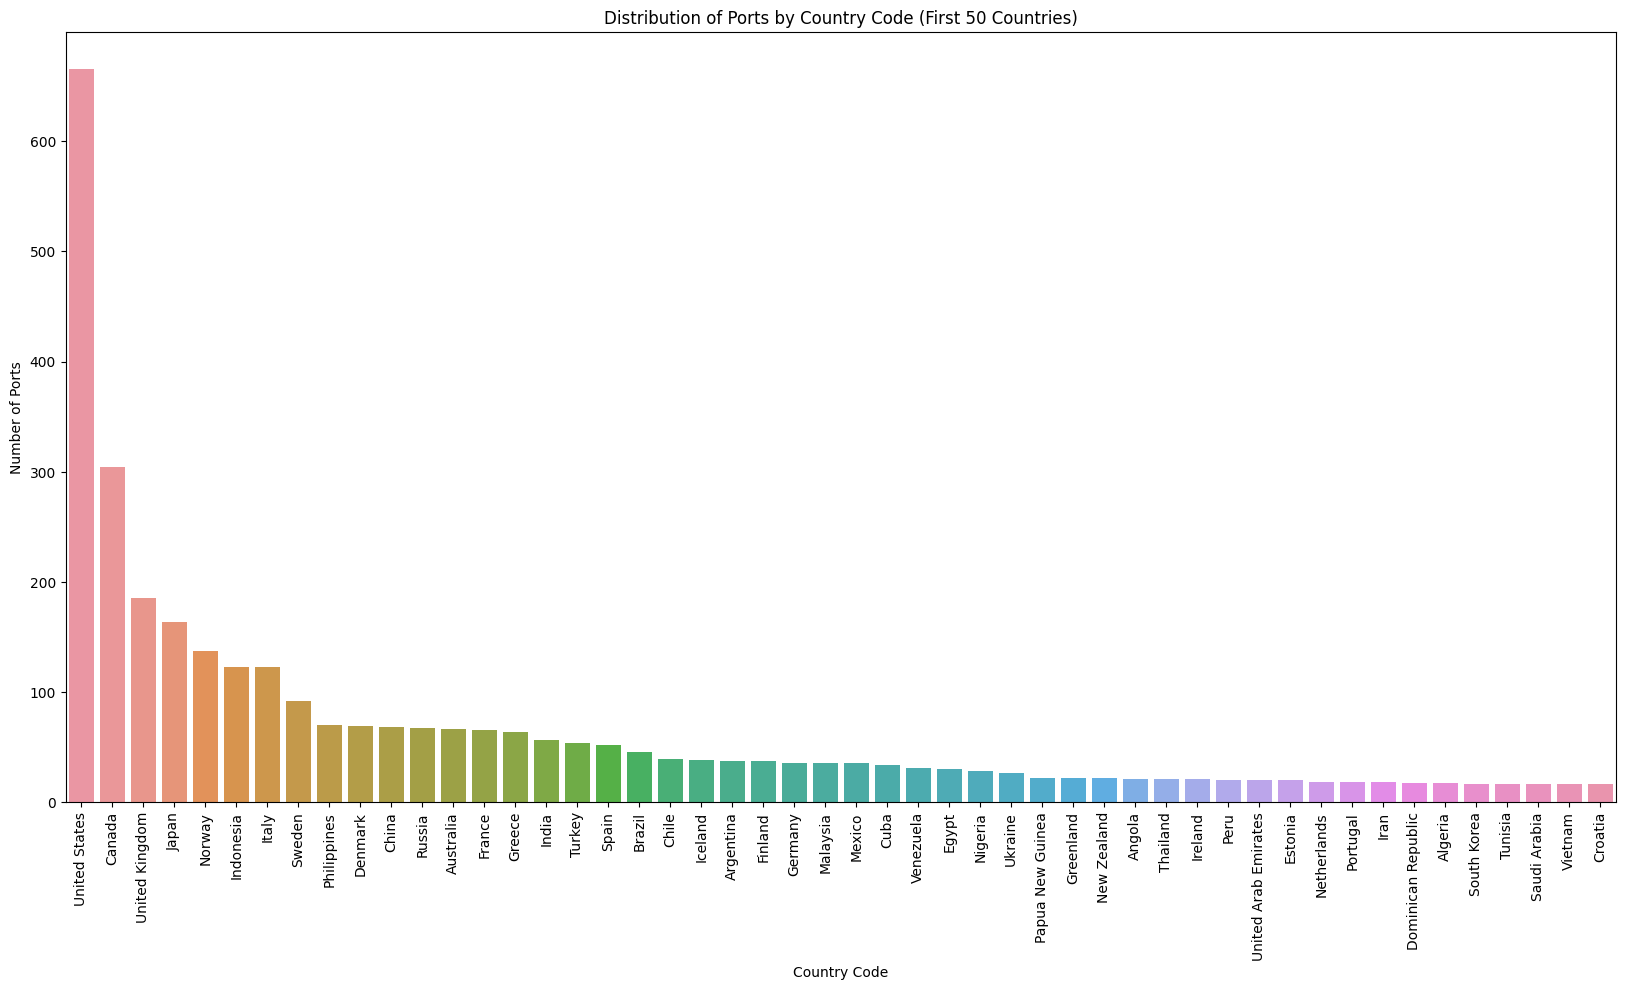

In [18]:
# Create a bar chart to visualize the distribution of ports by Country Code for the first 50 countries
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Country Code', order=df['Country Code'].value_counts().index[:50])
plt.title('Distribution of Ports by Country Code (First 50 Countries)')
plt.xlabel('Country Code')
plt.ylabel('Number of Ports')
plt.xticks(rotation=90)
plt.show()


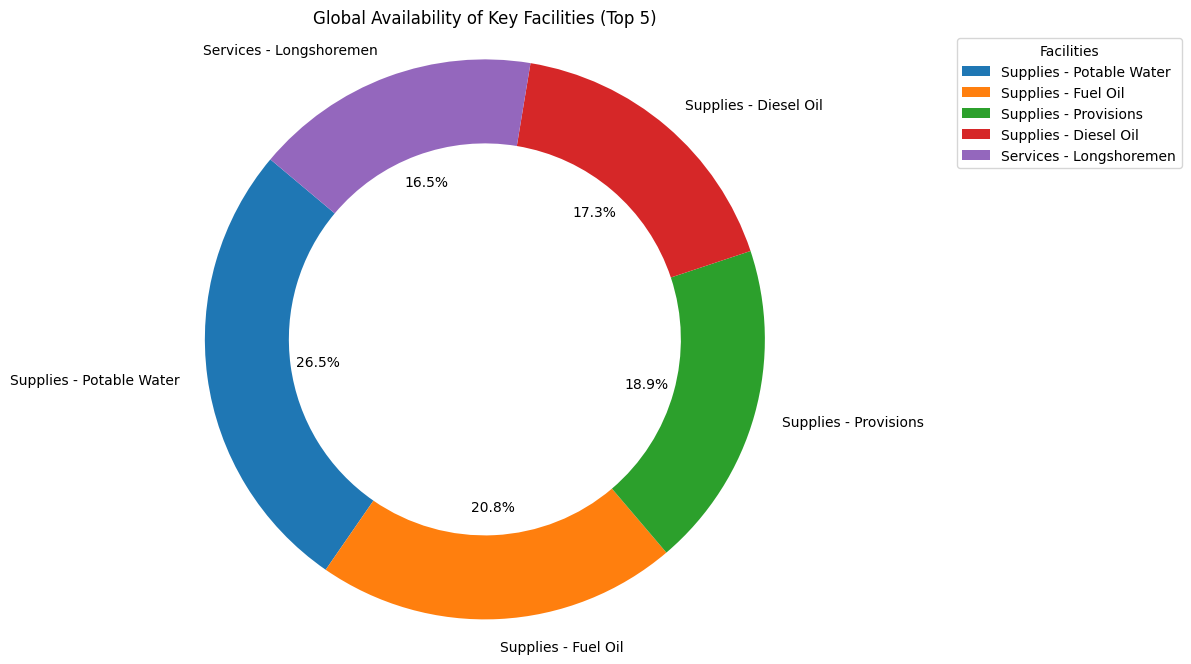

In [19]:
# Calculate the global availability of key facilities
global_availability = facilities_numerical.mean().sort_values(ascending=False).head(5)

# Create a pie chart to visualize the global availability of key facilities with a legend
plt.figure(figsize=(12, 8))
plt.pie(global_availability, labels=global_availability.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.legend(title='Facilities', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Global Availability of Key Facilities (Top 5)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

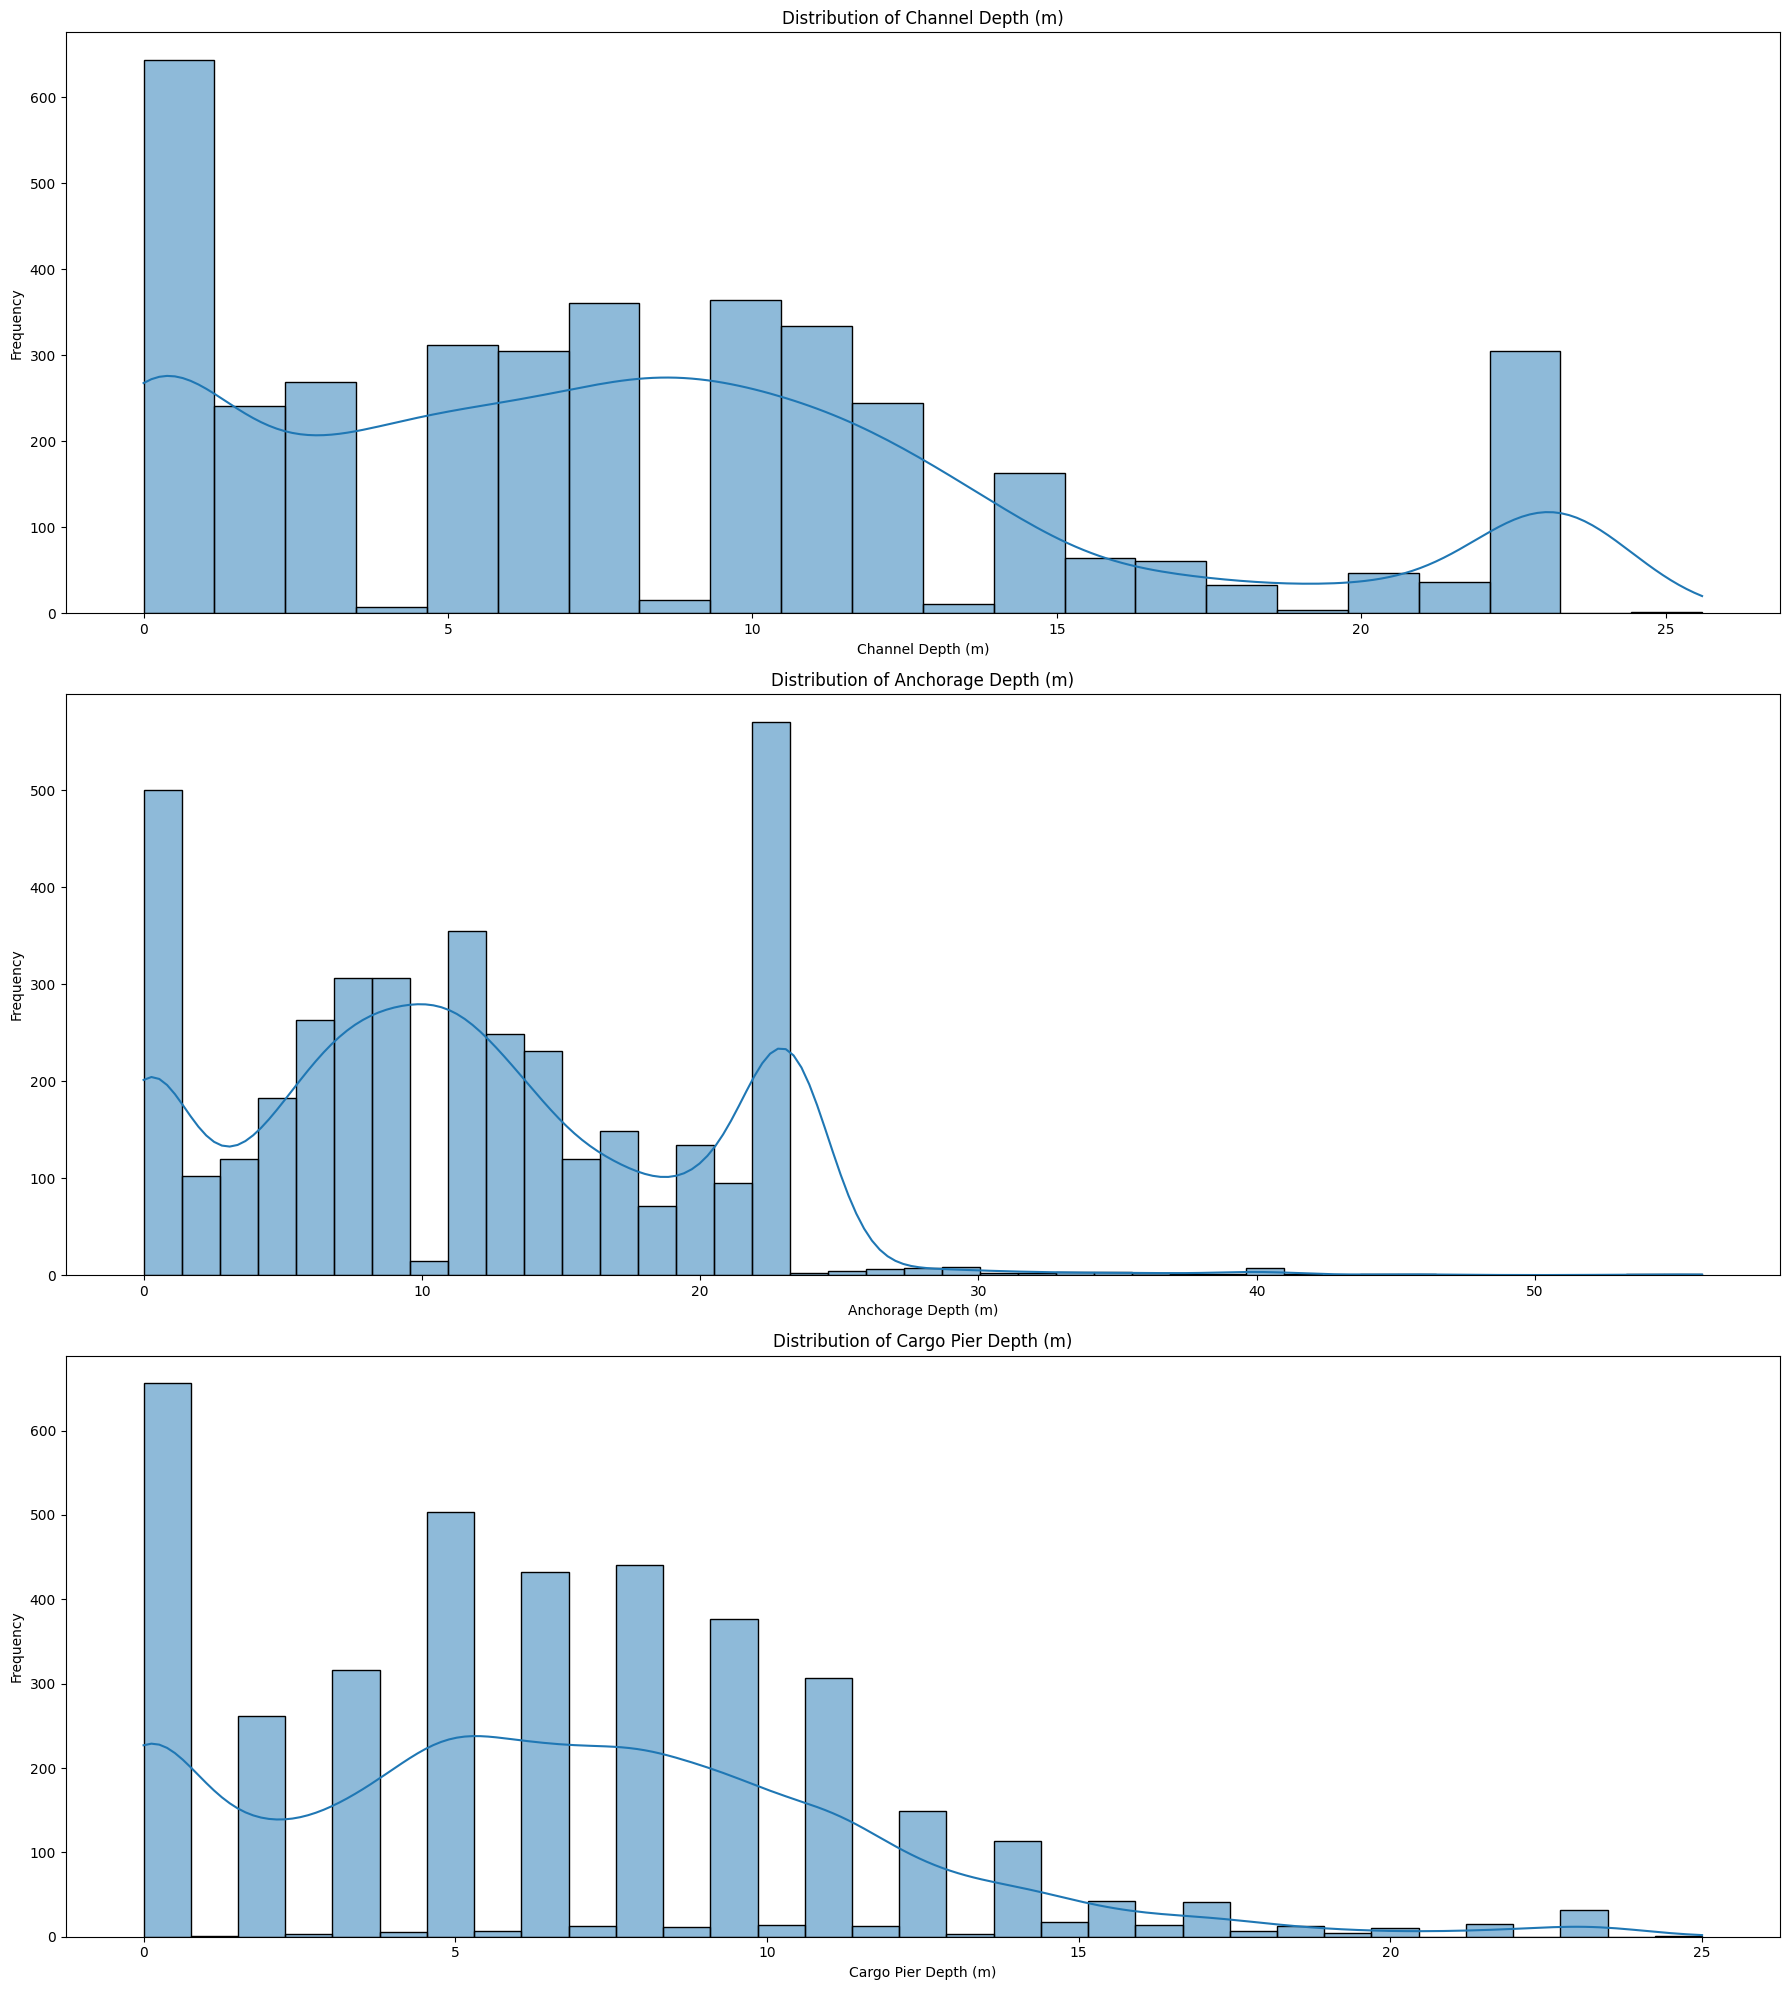

In [20]:
# List of depth-related columns
depth_columns = ['Channel Depth (m)', 'Anchorage Depth (m)', 'Cargo Pier Depth (m)']

# Create histograms to visualize the distribution of various types of depths
fig, axes = plt.subplots(len(depth_columns), 1, figsize=(18, 20))

for i, col in enumerate(depth_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


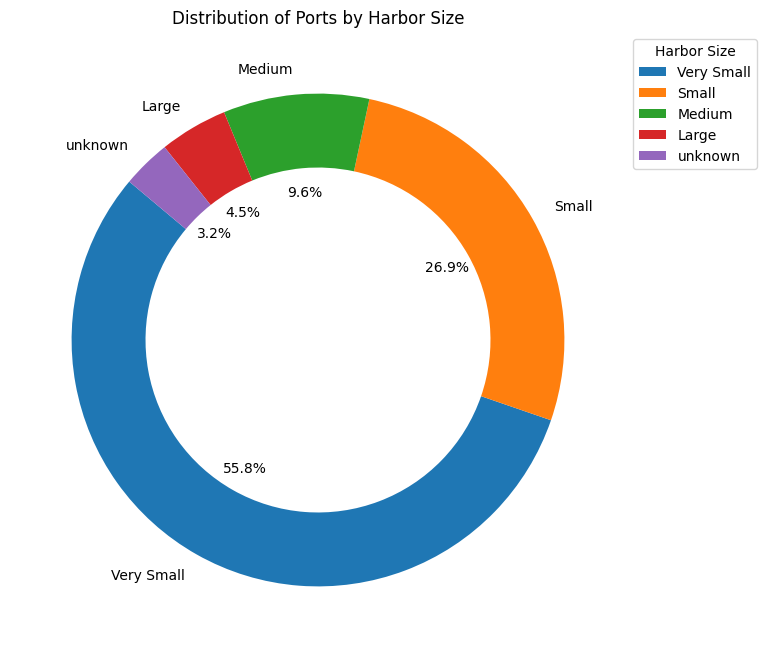

In [21]:
# plot using pie chart
plt.figure(figsize=(12, 8))
plt.pie(df['Harbor Size'].value_counts(), labels=df['Harbor Size'].value_counts().index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.legend(title='Harbor Size', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribution of Ports by Harbor Size')
plt.show()



d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\EDA\Exploratory-Data-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


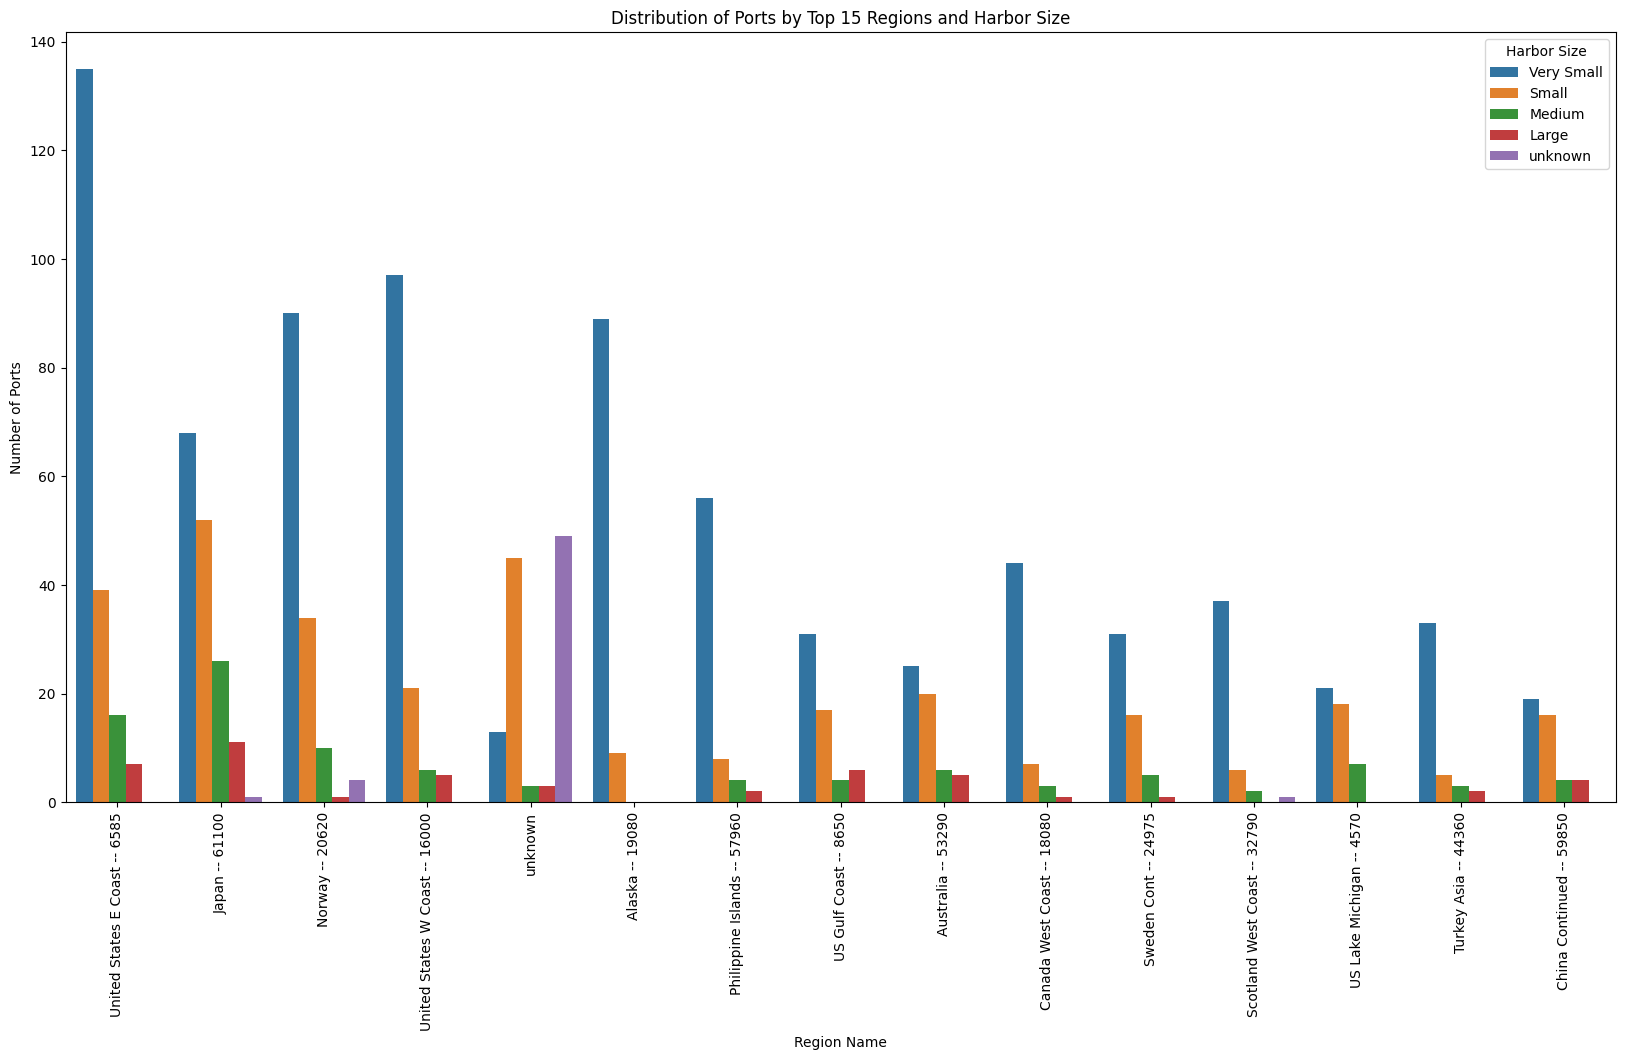

In [22]:
# Create a bar chart to visualize the distribution of ports by Region and Size
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Region Name', hue='Harbor Size', order=df['Region Name'].value_counts().index[:15])
plt.title('Distribution of Ports by Top 15 Regions and Harbor Size')
plt.xlabel('Region Name')
plt.ylabel('Number of Ports')
plt.xticks(rotation=90)
plt.legend(title='Harbor Size')
plt.show()


In [23]:
# Importing Plotly library
import plotly.express as px

# Selecting relevant columns for the map
map_data = df[['Latitude', 'Longitude', 'Main Port Name', 'Country Code', 'Harbor Size', 'Channel Depth (m)', 'Anchorage Depth (m)']]

# Creating the interactive map
fig = px.scatter_geo(map_data,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Main Port Name',
                     hover_data=['Country Code', 'Harbor Size', 'Channel Depth (m)', 'Anchorage Depth (m)'],
                     color='Harbor Size',
                     size='Channel Depth (m)',
                     color_continuous_scale='Viridis',
                     size_max=15,
                     opacity=0.7,
                     projection='natural earth',
                     template='plotly',
                     title='Enhanced Interactive Map of Ports')

# Update the layout and map style
fig.update_geos(
    showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)

# Show the map
fig.show()


In [24]:
# Import Plotly library
import plotly.figure_factory as ff

# Calculate the correlation matrix for the facilities
correlation_matrix = df[facilities_columns].apply(lambda x: x.replace({'Yes': 1, 'No': 0, 'Unknown': None}).astype(float)).corr()

# Create the interactive heatmap
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  annotation_text=correlation_matrix.round(2).values,
                                  colorscale='Viridis')

# Update layout
fig.update_layout(title='Interactive Correlation Matrix of Facilities',
                  xaxis=dict(title='Facility'),
                  yaxis=dict(title='Facility'))

# Show figure
fig.show()


In [38]:
# Import libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Prepare the data
facility_options = [{'label': facility, 'value': facility} for facility in facilities_columns]
initial_facility = facilities_columns[0]
initial_map = px.scatter_geo(df[df[initial_facility] == 'Yes'],
                             lat='Latitude',
                             lon='Longitude',
                             title=f'Ports with {initial_facility}')

# Define the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='facility-dropdown',
        options=facility_options,
        value=initial_facility
    ),
    dcc.Graph(
        id='facility-map',
        figure=initial_map
    )
])

# Define the callback to update the map
@app.callback(
    Output('facility-map', 'figure'),
    [Input('facility-dropdown', 'value')]
)
def update_map(selected_facility):
    filtered_df = df[df[selected_facility] == 'Yes']
    updated_map = px.scatter_geo(filtered_df,
                                 lat='Latitude',
                                 lon='Longitude',
                                 hover_name='Main Port Name',
                                 title=f'Ports with {selected_facility}',
                                 projection='natural earth',
                                 opacity=0.5)
    
    return updated_map

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
